### Import necessary libraries


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

### Define paths and parameters

In [39]:
train_data_dir = 'train_images_category'
test_data_dir = 'test_images_category'
img_width, img_height = 224, 224  # Image dimensions for MobileNetV2
batch_size = 32  # depends on your machine's memory capacity
num_classes = 15  # number of output classes
epochs = 20  # number of training epochs

### Reshaping images


In [40]:
if tf.keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Defining MobileNetV2 model


In [41]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)  # pre-trained on ImageNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

### Augmentation configuration for training & testing

In [42]:
# Augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Augmentation configuration for testing (just rescaling)
test_datagen = ImageDataGenerator(rescale=1. / 255)

### Generators for training

In [43]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Get the class indices
class_indices = train_generator.class_indices

# Print the number of images per category
for class_name, class_index in class_indices.items():
    num_images = len(train_generator.labels[train_generator.labels == class_index])
    print(f"Category: {class_name}, Number of Images: {num_images}")


Found 1600 images belonging to 15 classes.
Found 400 images belonging to 15 classes.
Category: banana, Number of Images: 81
Category: bed, Number of Images: 89
Category: bus, Number of Images: 84
Category: car, Number of Images: 47
Category: cat, Number of Images: 145
Category: clock, Number of Images: 444
Category: dog, Number of Images: 116
Category: kite, Number of Images: 43
Category: motorcycle, Number of Images: 86
Category: orange, Number of Images: 42
Category: oven, Number of Images: 31
Category: scissors, Number of Images: 63
Category: stop sign, Number of Images: 149
Category: traffic light, Number of Images: 149
Category: umbrella, Number of Images: 31


### Generators for testing

In [44]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Get the class indices
class_indices = test_generator.class_indices

# Print the number of images per category
for class_name, class_index in class_indices.items():
    num_images = len(test_generator.labels[test_generator.labels == class_index])
    print(f"Category: {class_name}, Number of Images: {num_images}")


Found 400 images belonging to 15 classes.
Category: banana, Number of Images: 23
Category: bed, Number of Images: 28
Category: bus, Number of Images: 13
Category: car, Number of Images: 12
Category: cat, Number of Images: 32
Category: clock, Number of Images: 105
Category: dog, Number of Images: 25
Category: kite, Number of Images: 10
Category: motorcycle, Number of Images: 21
Category: orange, Number of Images: 17
Category: oven, Number of Images: 16
Category: scissors, Number of Images: 14
Category: stop sign, Number of Images: 31
Category: traffic light, Number of Images: 42
Category: umbrella, Number of Images: 11


### Train images preview

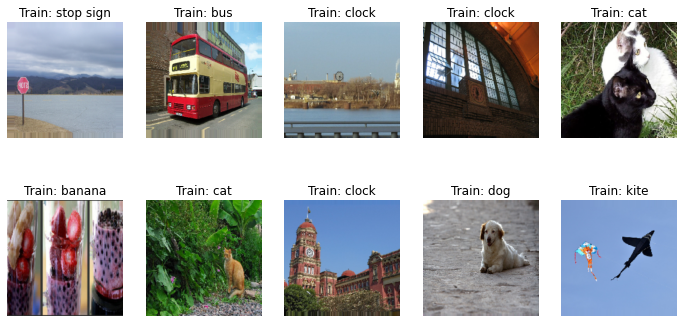

In [37]:
# Preview images from the train dataset
train_images, train_labels = next(train_generator)
train_class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(f"Train: {train_class_names[np.argmax(train_labels[i])]}")
    plt.axis('off')
plt.show()


### Test images preview

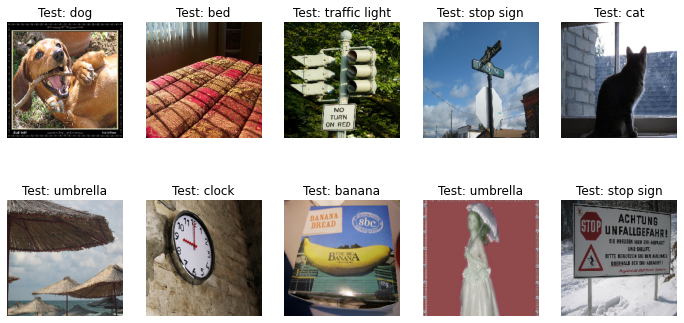

In [35]:
# Preview images from the test dataset
test_images, test_labels = next(test_generator)
test_class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Test: {test_class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.show()


### Training the model

In [45]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/20
50/50 [==============================] - 45s 840ms/step - loss: 1.6010 - accuracy: 0.5450 - val_loss: 0.8810 - val_accuracy: 0.7656
Epoch 2/20
50/50 [==============================] - 41s 809ms/step - loss: 0.6774 - accuracy: 0.8056 - val_loss: 0.6099 - val_accuracy: 0.8411
Epoch 3/20
50/50 [==============================] - 41s 821ms/step - loss: 0.4777 - accuracy: 0.8675 - val_loss: 0.5625 - val_accuracy: 0.8385
Epoch 4/20
50/50 [==============================] - 40s 797ms/step - loss: 0.3784 - accuracy: 0.8850 - val_loss: 0.5013 - val_accuracy: 0.8542
Epoch 5/20
50/50 [==============================] - 40s 799ms/step - loss: 0.3130 - accuracy: 0.9119 - val_loss: 0.4916 - val_accuracy: 0.8672
Epoch 6/20
50/50 [==============================] - 40s 802ms/step - loss: 0.2633 - accuracy: 0.9312 - val_loss: 0.4697 - val_accuracy: 0.8724
Epoch 7/20
50/50 [==============================] - 40s 797ms/step - loss: 0.2391 - accuracy: 0.9369 - val_loss: 0.4846 - val_accuracy: 0.8646

### Testing the model on new data


In [46]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)
print("Test accuracy:", test_acc)

C:\Users\muhri\AppData\Local\Temp\ipykernel_28316\1188958133.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test accuracy: 0.8932291865348816


### Plotting the training history


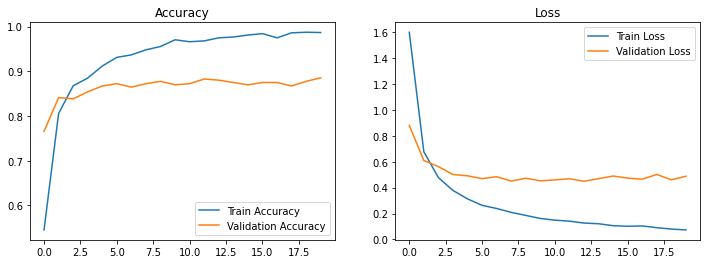

In [47]:
# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

### Display a batch of images from the trained set


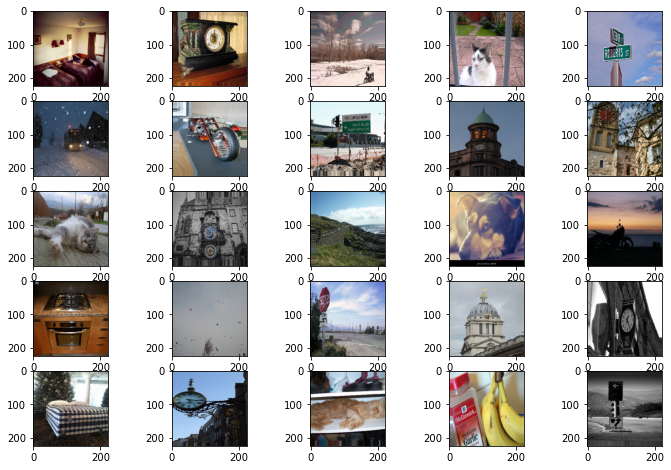

In [50]:
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(12, 8))
for i in range(0, min(25, x_batch.shape[0])):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(x_batch[i])
plt.show()

### Image classification on new data

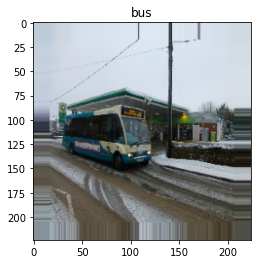

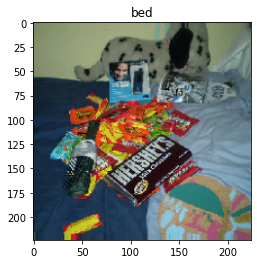

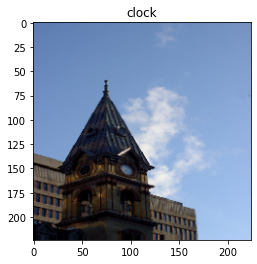

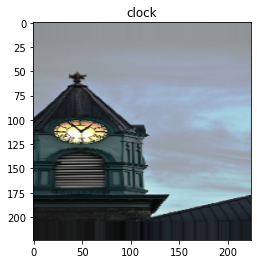

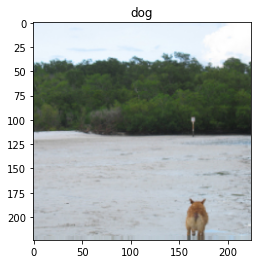

In [51]:
# Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# Get a mapping from class names to class indices
class_names = list(train_generator.class_indices.keys())
class_indices = list(train_generator.class_indices.values())
class_map = dict(zip(class_indices, class_names))

# Display images with class names
for i in range(0, 5):
    image = x_batch[i]
    label_index = y_batch[i].argmax()  # one-hot encoded, take argmax to get index
    label_name = class_map[label_index]
    plt.imshow(image)
    plt.title(label_name)
    plt.show()


## Save model into h5 format

In [52]:
model.save('model.h5')

### Convert into a TFlite model

In [54]:
# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\muhri\AppData\Local\Temp\tmpx7oc_k2e\assets


INFO:tensorflow:Assets written to: C:\Users\muhri\AppData\Local\Temp\tmpx7oc_k2e\assets
